<a href="https://colab.research.google.com/github/terrysu64/Machine-Learning-and-Data-Science-Projects/blob/main/neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network regression 

Steps
1.   **Create model** - define i/o + hidden layers
2.   **Complile model** - define loss function + optimizer + eval. metrics
3.   **Fittting model** - let model find patterns



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
tf.__version__

'2.8.2'

### manually create data and fit

In [ ]:
X = np.array([float(i) for i in range(-7,15,3)])
y = np.array([float(i) for i in range(3,25,3)])
X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

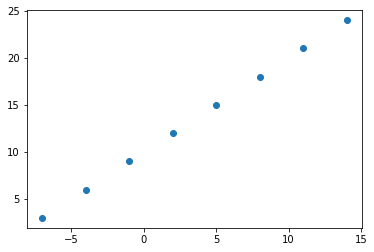

In [ ]:
plt.scatter(X,y)

### i/o shapes

In [ ]:
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
X[0].shape
tf.expand_dims(X, axis=-1)[0].shape

TensorShape([1])

### make neural network

In [ ]:
tf.random.set_seed(42)

#1.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                      
])

#2.
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. 
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
#predictions
model.predict([1,2.4]) #predicts mae = 10 to 11

array([[0.79506004],
       [1.8381441 ]], dtype=float32)

### improving a model

In [ ]:
 #alter previous steps 
 #1. more layers, more hidden units, activation function...
 #2. learning rate, optimization function...
 #3. more epochs, more data....

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) #more epochs

Epoch 1/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8423 - mae: 10.8423
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 10.7098 - mae: 10.7098
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5773 - mae: 10.5773
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4448 - mae: 10.4448
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.3123 - mae: 10.3123
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1798 - mae: 10.1798
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0473 - mae: 10.0473
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.9148 - mae: 9.9148
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 9.7823 - mae: 9.7823
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 9.6498 - mae: 9.6498
Epoch 11/100
1/1 [==============================] - 0s 9ms/ste

In [ ]:
model.predict([1,2.4])

array([[2.595059 ],
       [5.0101423]], dtype=float32)

In [ ]:
X = tf.constant([float(i) for i in range(-7,85,3)])
y = tf.constant([float(i) for i in range(3,95,3)])
                                                                                 
#1.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(1)                     
])

#2. 
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #learning rate most important***
              metrics=["mae"])

#3.
model.fit(tf.expand_dims(X, axis=-1), tf.expand_dims(y, axis=-1), epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 613ms/step - loss: 61.4399 - mae: 61.4399
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 57.1853 - mae: 57.1853
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 52.8207 - mae: 52.8207
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 48.6025 - mae: 48.6025
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 44.4365 - mae: 44.4365
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 40.3182 - mae: 40.3182
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 36.1233 - mae: 36.1233
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 31.9679 - mae: 31.9679
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 27.7525 - mae: 27.7525
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 23.4830 - mae: 23.4830
Epoch 11/100
1/1 [==============================] - 0s 10

In [ ]:
model.predict([1,2.4,20,-2])

array([[10.989498 ],
       [12.517855 ],
       [30.467865 ],
       [ 7.4766374]], dtype=float32)

### Evaluating a model

> visualisation is key

good idea to visualize:
* the data
* the model itself
* the training of a model
* the predictions of a model

In [ ]:
X = tf.range(-100,100,4)
y=X+20
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

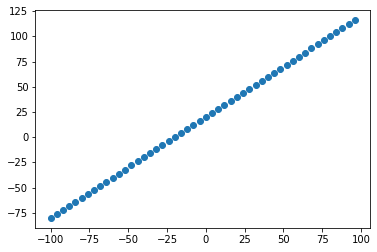

In [ ]:
#visualize data
plt.scatter(X,y)

In [ ]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

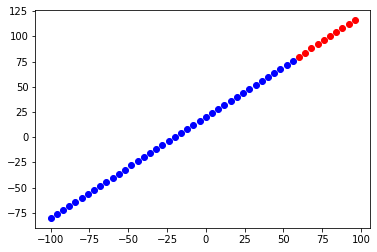

In [ ]:
#visualize split data
plt.scatter(X_train,y_train,c="b",label="train")
plt.scatter(X_test,y_test,c="r",label="test")
plt.show()

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="regression_model")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.summary() 
print("params = weight and bias in this case")

Model: "regression_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
params = weight and bias in this case


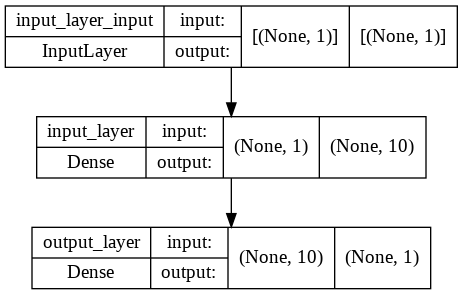

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [ ]:
model.fit(tf.expand_dims(X, axis=-1), tf.expand_dims(y, axis=-1), epochs=100, verbose=0)

### visualizing model predictions
* plotting y_preds against y_test

In [ ]:
y_preds = model.predict(X_test)
y_preds

array([[ 81.35153 ],
       [ 85.43955 ],
       [ 89.52757 ],
       [ 93.61559 ],
       [ 97.70361 ],
       [101.79164 ],
       [105.879654],
       [109.96767 ],
       [114.05569 ],
       [118.14371 ]], dtype=float32)

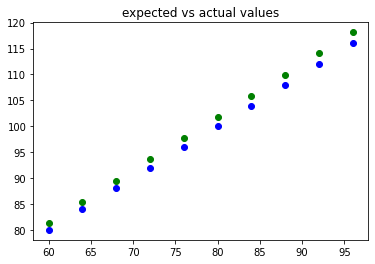

In [ ]:
def plot_preds(X_test=X_test,
               y_test=y_test,
               y_preds=y_preds):
  plt.title("expected vs actual values")
  plt.scatter(X_test,y_test,c="b",label="testing data")
  plt.scatter(X_test,y_preds,c="g",label="predictions")
  plt.show()
plot_preds()

### regression evaluation metrics

In [ ]:
tf.metrics.mean_absolute_error(y_true=y_test,
                               y_pred=tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=1.7476219>

In [ ]:
tf.metrics.mean_squared_error(y_true=y_test,
                               y_pred=tf.squeeze(y_preds))

#possible ways to improve: change hyperparams, different optimizer, change neural network structure/layers

<tf.Tensor: shape=(), dtype=float32, numpy=3.1180987>

###saving/loading a model

In [53]:
 #can either save in SavedModel format or HDF5 format
 model.save("regression_model")

INFO:tensorflow:Assets written to: regression_model/assets


INFO:tensorflow:Assets written to: regression_model/assets


In [55]:
saved_model = tf.keras.models.load_model("/content/regression_model")
saved_model.summary()

Model: "regression_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## A larger example: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [58]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
